In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import shap

from scipy.stats import pearsonr, spearmanr, pointbiserialr, chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Set your desired working folder path
working_folder = r"C:\Users\shash\Downloads"

# Set the working directory
os.chdir(working_folder)

# Verify the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\shash\Downloads


In [3]:
# Load the uploaded EpiClim dataset
file_path = "final_datav1.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985 entries, 0 to 8984
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8985 non-null   int64  
 1   week_of_outbreak  8985 non-null   object 
 2   state_ut          8985 non-null   object 
 3   district          8985 non-null   object 
 4   Disease           8985 non-null   object 
 5   Cases             8985 non-null   object 
 6   Deaths            2554 non-null   float64
 7   day               8985 non-null   int64  
 8   mon               8985 non-null   int64  
 9   year              8985 non-null   int64  
 10  Latitude          8985 non-null   float64
 11  Longitude         8985 non-null   float64
 12  preci             8849 non-null   float64
 13  LAI               6790 non-null   float64
 14  Temp              8047 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.0+ MB


In [4]:
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160,NaN,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8,NaN,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7,NaN,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14,NaN,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [5]:
df.dtypes

Unnamed: 0            int64
week_of_outbreak     object
state_ut             object
district             object
Disease              object
Cases                object
Deaths              float64
day                   int64
mon                   int64
year                  int64
Latitude            float64
Longitude           float64
preci               float64
LAI                 float64
Temp                float64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
count,8985.000000,2554.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8849.000000,6790.000000,8047.000000
mean,4492.000000,1.584573,15.423150,6.985865,2014.655426,20.623102,80.113904,0.462125,10.907143,304.519531
std,2593.890418,5.389499,8.871505,2.687808,3.354520,5.873265,5.698627,0.628652,7.920346,6.980089
min,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000
25%,2246.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.023705,5.000000,300.602000
50%,4492.000000,1.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.225489,9.000000,303.445000
75%,6738.000000,1.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.672831,14.000000,308.590000
max,8984.000000,147.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000


In [7]:
## Total of 8985 records in the table

In [8]:
total_entries = len(df)
print("Total entries:", total_entries)

Total entries: 8985


In [9]:
### Missing values
df.isna().sum()

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

In [10]:
# Before removal
print("Shape before removing duplicates:", df.shape)

# Remove duplicates
df = df.drop_duplicates()

# After removal
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (8985, 15)
Shape after removing duplicates: (8985, 15)


In [11]:
## If a missing death count implies zero deaths
df['Deaths'] = df['Deaths'].fillna(0).astype(int)

In [12]:
### Drop Redundant Columns
## Unnamed: 0 appears to be an index placeholder. Drop it:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
### Cases: convert to integer, coercing errors to NaN, then address any leftovers:
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce').fillna(0).astype(int)

In [14]:
# Remove non-numeric characters and extract the week number
df['week_of_outbreak'] = df['week_of_outbreak'].str.extract(r'(\d+)')

# Convert to integer type
df['week_of_outbreak'] = df['week_of_outbreak'].astype(int)

In [15]:
## List all disease types
print(df['Disease'].unique())

['Acute Diarrhoeal Disease' 'Malaria' 'Acute Encephalitis Syndrome'
 'Acute Gastroenteritis' 'Dengue' 'pyrexia of unknown origin'
 'Chikungunya' 'Cholera' 'Malaria (PV)' 'Dengue Fever' 'Suspected Dengue'
 'Dengue Chikungunya' 'Dengue And Chikungunya' 'Suspected Cholera'
 'Diarrhea' 'Suspected Chikungunya' 'Suspected Dengue And Chikungunya'
 'Gastroenteritis' 'Dengue And Malaria' 'Dengue/Chikungunya'
 'Chikungunya/Dengue' 'Chikungunya/ Dengue']


In [16]:
## Get the disease count for each type 
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Disease
Acute Diarrhoeal Disease            5126
Dengue                              1619
Chikungunya                          731
Cholera                              666
Malaria                              544
Acute Encephalitis Syndrome          111
Acute Gastroenteritis                100
Dengue And Chikungunya                53
Suspected Dengue                      14
Dengue And Malaria                     3
Suspected Chikungunya                  3
Dengue/Chikungunya                     3
Dengue Fever                           2
Suspected Cholera                      2
pyrexia of unknown origin              1
Malaria (PV)                           1
Dengue Chikungunya                     1
Diarrhea                               1
Gastroenteritis                        1
Suspected Dengue And Chikungunya       1
Chikungunya/Dengue                     1
Chikungunya/ Dengue                    1
Name: count, dtype: int64


In [17]:
# List of values to replace all mosquitoe borned disease with single disease type 
# All mosquitor borne diseases are associated with same season outbreak - mostly rainly season
replace_values = [
    "Malaria (PV)",
    "Dengue And Malaria",
    "Dengue",
    "Suspected Dengue And Chikungunya",
    "Dengue Fever",
    "Dengue/Chikungunya",
    "Suspected Dengue",
    "Dengue Chikungunya",
    "Chikungunya",
    "Malaria",
    "Chikungunya/ Dengue",
    "Chikungunya/Dengue",
    "Suspected Chikungunya",
    "Dengue And Chikungunya",
    "Acute Encephalitis Syndrome"
]
## Japanese Encephalitis Virus (JEV) – Most common cause in India, spread by Culex mosquitoes.
# Replace them with a single value
df['Disease'] = df['Disease'].replace(replace_values, "MosquitoeBorneDisease")

In [18]:
count_aes = (df['Disease'] == "MosquitoeBorneDisease").sum()
print(f"Number of rows with MosquitoeBorneDisease: {count_aes}")

Number of rows with MosquitoeBorneDisease: 3088


In [19]:
print(df['Disease'].unique())

['Acute Diarrhoeal Disease' 'MosquitoeBorneDisease'
 'Acute Gastroenteritis' 'pyrexia of unknown origin' 'Cholera'
 'Suspected Cholera' 'Diarrhea' 'Gastroenteritis']


In [20]:
# Club all diarrhea diseases with common name
df['Disease'] = df['Disease'].replace("Diarrhea", "Acute Diarrhoeal Disease")
count_add = (df['Disease'] == "Acute Diarrhoeal Disease").sum()
print(f"Number of rows with Acute Diarrhoeal Disease: {count_add}")

Number of rows with Acute Diarrhoeal Disease: 5127


In [21]:
df['Disease'] = df['Disease'].replace("Suspected Cholera", "Cholera")
count_chl = (df['Disease'] == "Cholera").sum()
print(f"Number of rows with Cholera: {count_chl}")

Number of rows with Cholera: 668


In [22]:
df['Disease'] = df['Disease'].replace("Gastroenteritis", "Acute Gastroenteritis")
count_ag = (df['Disease'] == "Acute Gastroenteritis").sum()
print(f"Number of rows with Gastroenteritis: {count_ag}")

Number of rows with Gastroenteritis: 101


In [23]:
## Get the disease count for each type 
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Disease
Acute Diarrhoeal Disease     5127
MosquitoeBorneDisease        3088
Cholera                       668
Acute Gastroenteritis         101
pyrexia of unknown origin       1
Name: count, dtype: int64


In [24]:
### Delete single row disease
df = df[df['Disease'] != 'pyrexia of unknown origin']

In [25]:
## Arrange per date
# 1. Rename 'mon' → 'month'
df = df.rename(columns={'mon': 'month'})

# 2. Assemble the date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# 3. Sort by state, district, and date
df.sort_values(['state_ut', 'district', 'date'], inplace=True)

# 4. Set date as index for time-based interpolation
df = df.set_index('date')

# 5. Columns to interpolate
cols = ['preci', 'LAI', 'Temp']

# 6. Group by state_ut and district, interpolate missing values
df[cols] = (
    df.groupby(['state_ut', 'district'], group_keys=False)[cols]
      .apply(lambda grp: grp.interpolate(method='time'))
)

# 7. If you want date back as a column
df = df.reset_index()

In [26]:
df.sort_values(['state_ut','district','year','week_of_outbreak'], inplace=True)


In [27]:
## Missing values
df.isna().sum()

date                  0
week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
month                 0
year                  0
Latitude              0
Longitude             0
preci               136
LAI                 248
Temp                119
dtype: int64

In [28]:
## After interpolation, any residual nulls → fill with district median, else global median:
for col in ['preci', 'LAI', 'Temp']:
    # First fill missing values with the group-level median
    group_median = df.groupby(['state_ut', 'district'])[col].transform('median')
    df[col] = df[col].fillna(group_median)
    
    # Then fill any remaining missing values with the overall median
    df[col] = df[col].fillna(df[col].median())


In [29]:
df.isna().sum()

date                0
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
Deaths              0
day                 0
month               0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64

In [30]:
df.head()

,date,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp
0,2019-06-06,23,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,8,0,6,6,2019,13.511120,92.917388,0.772605,33.0,301.720000
1,2019-10-09,41,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,30,0,9,10,2019,13.511120,92.917388,0.149858,42.0,298.906667
2,2013-12-16,51,Andaman and Nicobar Islands,North and Middle Andaman,Acute Diarrhoeal Disease,86,0,16,12,2013,12.611239,92.831654,0.188149,53.0,298.200000
3,2010-06-09,24,Andhra Pradesh,Anantapur,MosquitoeBorneDisease,68,0,9,6,2010,14.654623,77.556260,0.254048,4.0,311.175000
4,2011-06-26,25,Andhra Pradesh,Anantapur,Acute Diarrhoeal Disease,23,0,26,6,2011,14.654623,77.556260,0.027715,4.0,307.820000


In [31]:
df.dtypes

date                datetime64[ns]
week_of_outbreak             int64
state_ut                    object
district                    object
Disease                     object
Cases                        int64
Deaths                       int64
day                          int64
month                        int64
year                         int64
Latitude                   float64
Longitude                  float64
preci                      float64
LAI                        float64
Temp                       float64
dtype: object

In [32]:
df.isna().sum()

date                0
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
Deaths              0
day                 0
month               0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64

In [33]:
### Create the 2 week lagged temp and precipitation

# Convert year + week_of_outbreak to a real date (ISO weeks start on Monday)
df['week_start_date'] = pd.to_datetime(df['year'].astype(str) + '-W' + df['week_of_outbreak'].astype(str) + '-1', format='%G-W%V-%u')

# Sort by state_ut, district, and week_start_date
df = df.sort_values(['state_ut', 'district', 'week_start_date']).reset_index(drop=True)

# Create lag features
df['Temp_lag2'] = df.groupby(['state_ut', 'district'])['Temp'].shift(2)
df['preci_lag2'] = df.groupby(['state_ut', 'district'])['preci'].shift(2)

# Impute missing lag values using YEAR-wise, STATE-wise, DISTRICT-wise mean
df['Temp_lag2'] = (
    df.groupby(['state_ut', 'district', 'year'])['Temp_lag2']
    .transform(lambda x: x.fillna(x.mean()))
)


## # Precipitation lag → fill missing values with 0
df['preci_lag2'] = df['preci_lag2'].fillna(0)

# (Optional) If still NaN remains (e.g., if entire year has <2 weeks of data for a district)
df['Temp_lag2'] = df['Temp_lag2'].fillna(df['Temp'].mean())
df['preci_lag2'] = df['preci_lag2'].fillna(df['preci'].mean())

In [34]:
df.head()

,date,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
0,2019-06-06,23,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,8,0,6,6,2019,13.511120,92.917388,0.772605,33.0,301.720000,2019-06-03,304.490895,0.0
1,2019-10-09,41,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,30,0,9,10,2019,13.511120,92.917388,0.149858,42.0,298.906667,2019-10-07,304.490895,0.0
2,2013-12-16,51,Andaman and Nicobar Islands,North and Middle Andaman,Acute Diarrhoeal Disease,86,0,16,12,2013,12.611239,92.831654,0.188149,53.0,298.200000,2013-12-16,304.490895,0.0
3,2010-06-09,24,Andhra Pradesh,Anantapur,MosquitoeBorneDisease,68,0,9,6,2010,14.654623,77.556260,0.254048,4.0,311.175000,2010-06-14,304.490895,0.0
4,2011-06-26,25,Andhra Pradesh,Anantapur,Acute Diarrhoeal Disease,23,0,26,6,2011,14.654623,77.556260,0.027715,4.0,307.820000,2011-06-20,308.938333,0.0


In [35]:
df.describe()

,date,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
count,8984,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984,8984.000000,8984.000000
mean,2015-03-11 18:09:17.791629312,29.675423,88.647818,0.450467,15.421416,6.986532,2014.654608,20.624165,80.114015,0.458585,10.900411,304.490895,2015-03-17 02:10:47.551202048,304.646544,0.390120
min,2009-05-04 00:00:00,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000,2008-12-29 00:00:00,259.680000,0.000000
25%,2012-05-27 00:00:00,22.000000,15.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.025043,6.000000,300.661154,2012-05-28 00:00:00,301.148500,0.000515
50%,2015-04-14 00:00:00,30.000000,27.000000,0.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.225489,9.000000,303.460000,2015-04-20 00:00:00,304.490895,0.127583
75%,2017-08-01 00:00:00,39.000000,53.000000,0.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.665491,14.000000,308.435250,2017-08-07 00:00:00,307.740000,0.577848
max,2022-06-29 00:00:00,53.000000,51225.000000,147.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000,2022-06-13 00:00:00,327.728000,5.680000
std,NaN,11.977927,782.249279,2.960762,8.870476,2.687215,3.353812,5.872728,5.698935,0.624566,7.707121,6.821026,NaN,6.266909,0.602070


In [36]:
print(df.columns.tolist())


['date', 'week_of_outbreak', 'state_ut', 'district', 'Disease', 'Cases', 'Deaths', 'day', 'month', 'year', 'Latitude', 'Longitude', 'preci', 'LAI', 'Temp', 'week_start_date', 'Temp_lag2', 'preci_lag2']


In [37]:
## Lets filter diarrahea disease cases 

df_dia = df[df['Disease'].str.contains('Acute Diarrhoeal Disease',
                                       case=False, na=False)].copy()

In [38]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5127 entries, 0 to 8983
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5127 non-null   datetime64[ns]
 1   week_of_outbreak  5127 non-null   int64         
 2   state_ut          5127 non-null   object        
 3   district          5127 non-null   object        
 4   Disease           5127 non-null   object        
 5   Cases             5127 non-null   int64         
 6   Deaths            5127 non-null   int64         
 7   day               5127 non-null   int64         
 8   month             5127 non-null   int64         
 9   year              5127 non-null   int64         
 10  Latitude          5127 non-null   float64       
 11  Longitude         5127 non-null   float64       
 12  preci             5127 non-null   float64       
 13  LAI               5127 non-null   float64       
 14  Temp              5127 non-nu

In [39]:
df_dia.describe()

,date,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
count,5127,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127,5127.000000,5127.000000
mean,2014-12-07 10:54:25.067290880,28.320265,49.051297,0.246928,15.539302,6.778818,2014.413497,21.526078,80.546931,0.475725,10.500286,304.380285,2014-12-09 14:45:51.082504448,304.457985,0.391743
min,2009-06-02 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,8.188047,68.968002,0.000002,0.000000,261.300000,2008-12-29 00:00:00,259.680000,0.000000
25%,2011-11-29 12:00:00,21.000000,16.000000,0.000000,8.000000,5.000000,2011.000000,18.083333,76.154742,0.024733,5.240214,300.536000,2011-12-05 00:00:00,300.991542,0.000149
50%,2014-08-17 00:00:00,29.000000,28.000000,0.000000,15.000000,7.000000,2014.000000,22.354747,79.092936,0.231161,9.000000,303.213333,2014-08-18 00:00:00,304.440000,0.116283
75%,2017-05-15 00:00:00,36.000000,52.000000,0.000000,23.000000,9.000000,2017.000000,25.126578,85.111956,0.698158,14.000000,308.682368,2017-05-15 00:00:00,307.420833,0.587993
max,2022-06-29 00:00:00,53.000000,4485.000000,28.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,60.000000,327.728000,2022-06-13 00:00:00,327.728000,5.293819
std,NaN,11.696581,99.186775,0.891652,8.877211,2.643951,3.414224,5.492591,5.575461,0.635835,7.097976,7.168922,NaN,6.468085,0.603787


In [40]:
# Rename for pandas’ to_datetime
df_dia = df_dia.rename(columns={'mon': 'month'})

# Combine year, month, day into a single datetime column
df_dia['date'] = pd.to_datetime(df_dia[['year', 'month', 'day']])

In [41]:
#Sort by all grouping keys + year & week
df_dia = df_dia.sort_values(
    by=['state_ut', 'district', 'Disease', 'year', 'week_of_outbreak']
).reset_index(drop=True)

In [42]:
df_dia.set_index('date', inplace=True)


In [43]:
# Create 4 week rolling avergage .. Sort data to ensure rolling works across years
df_dia = df_dia.sort_values(['state_ut', 'district', 'year', 'week_of_outbreak'])

# Rolling average for consecutive 4 weeks across years
df_dia['cases_4wk_avg'] = (
    df_dia.groupby(['state_ut', 'district'])['Cases']
          .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
)

In [44]:
## Outbreak flag: mark a week as outbreak if Cases > 2×4-week average: Per WHO and health orgs.. diarrahea outbreak definition
##df_dia['diar_outbreak_flag'] = (df_dia['Cases'] > 2*df_dia['cases_4wk_avg']).astype(int)
df_dia['diar_outbreak_flag'] = (df_dia['Cases'] > df_dia['cases_4wk_avg']).astype(int)

In [45]:
# Make sure week_of_outbreak is int
df_dia['week_of_outbreak'] = df_dia['week_of_outbreak'].astype(int)

In [46]:
# Sum of 1’s gives the total number of outbreaks
outbreak_count = df_dia['diar_outbreak_flag'].sum()
print(f"Total Diarrhorea outbreak entries: {outbreak_count}")

Total Diarrhorea outbreak entries: 1837


In [47]:
df_dia.dtypes

week_of_outbreak               int64
state_ut                      object
district                      object
Disease                       object
Cases                          int64
Deaths                         int64
day                            int64
month                          int64
year                           int64
Latitude                     float64
Longitude                    float64
preci                        float64
LAI                          float64
Temp                         float64
week_start_date       datetime64[ns]
Temp_lag2                    float64
preci_lag2                   float64
cases_4wk_avg                float64
diar_outbreak_flag             int64
dtype: object

In [48]:
df_dia.isna().sum()

week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
month                 0
year                  0
Latitude              0
Longitude             0
preci                 0
LAI                   0
Temp                  0
week_start_date       0
Temp_lag2             0
preci_lag2            0
cases_4wk_avg         0
diar_outbreak_flag    0
dtype: int64

In [49]:
### Add outbreak rates as new features which may provide hidden patterns associated with past epidemic history 

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_dia.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_dia['state_outbreak_rate'] = df_dia['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_dia.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_dia['district_outbreak_rate'] = df_dia.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

In [50]:
df_dia.describe()

,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2,cases_4wk_avg,diar_outbreak_flag,state_outbreak_rate,district_outbreak_rate
count,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000
mean,28.320265,49.051297,0.246928,15.539302,6.778818,2014.413497,21.526078,80.546931,0.475725,10.500286,304.380285,2014-12-09 14:45:51.082504448,304.457985,0.391743,51.045998,0.358299,0.358299,0.358299
min,1.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,8.188047,68.968002,0.000002,0.000000,261.300000,2008-12-29 00:00:00,259.680000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,21.000000,16.000000,0.000000,8.000000,5.000000,2011.000000,18.083333,76.154742,0.024733,5.240214,300.536000,2011-12-05 00:00:00,300.991542,0.000149,22.500000,0.000000,0.340000,0.285714
50%,29.000000,28.000000,0.000000,15.000000,7.000000,2014.000000,22.354747,79.092936,0.231161,9.000000,303.213333,2014-08-18 00:00:00,304.440000,0.116283,34.250000,0.000000,0.353100,0.384615
75%,36.000000,52.000000,0.000000,23.000000,9.000000,2017.000000,25.126578,85.111956,0.698158,14.000000,308.682368,2017-05-15 00:00:00,307.420833,0.587993,57.000000,1.000000,0.377528,0.451613
max,53.000000,4485.000000,28.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,60.000000,327.728000,2022-06-13 00:00:00,327.728000,5.293819,2298.500000,1.000000,0.500000,0.888889
std,11.696581,99.186775,0.891652,8.877211,2.643951,3.414224,5.492591,5.575461,0.635835,7.097976,7.168922,NaN,6.468085,0.603787,76.454289,0.479547,0.045490,0.154966


In [51]:
df_dia.dtypes

week_of_outbreak                   int64
state_ut                          object
district                          object
Disease                           object
Cases                              int64
Deaths                             int64
day                                int64
month                              int64
year                               int64
Latitude                         float64
Longitude                        float64
preci                            float64
LAI                              float64
Temp                             float64
week_start_date           datetime64[ns]
Temp_lag2                        float64
preci_lag2                       float64
cases_4wk_avg                    float64
diar_outbreak_flag                 int64
state_outbreak_rate              float64
district_outbreak_rate           float64
dtype: object

In [52]:
df_dia.isna().sum()

week_of_outbreak          0
state_ut                  0
district                  0
Disease                   0
Cases                     0
Deaths                    0
day                       0
month                     0
year                      0
Latitude                  0
Longitude                 0
preci                     0
LAI                       0
Temp                      0
week_start_date           0
Temp_lag2                 0
preci_lag2                0
cases_4wk_avg             0
diar_outbreak_flag        0
state_outbreak_rate       0
district_outbreak_rate    0
dtype: int64

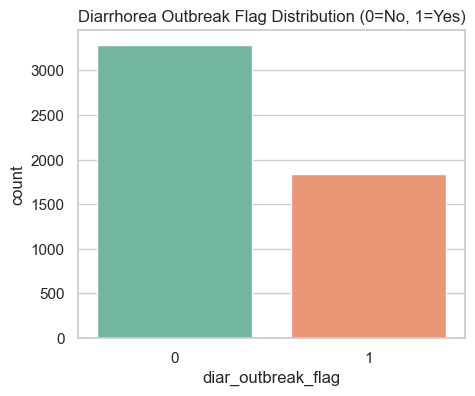

In [53]:
### EDA



# Set style
sns.set(style="whitegrid", palette="Set2")

# -----------------------
# Target Distribution
# -----------------------
plt.figure(figsize=(5,4))
sns.countplot(data=df_dia, x="diar_outbreak_flag", hue="diar_outbreak_flag", palette="Set2", legend=False)
plt.title("Diarrhorea Outbreak Flag Distribution (0=No, 1=Yes)")
plt.show()

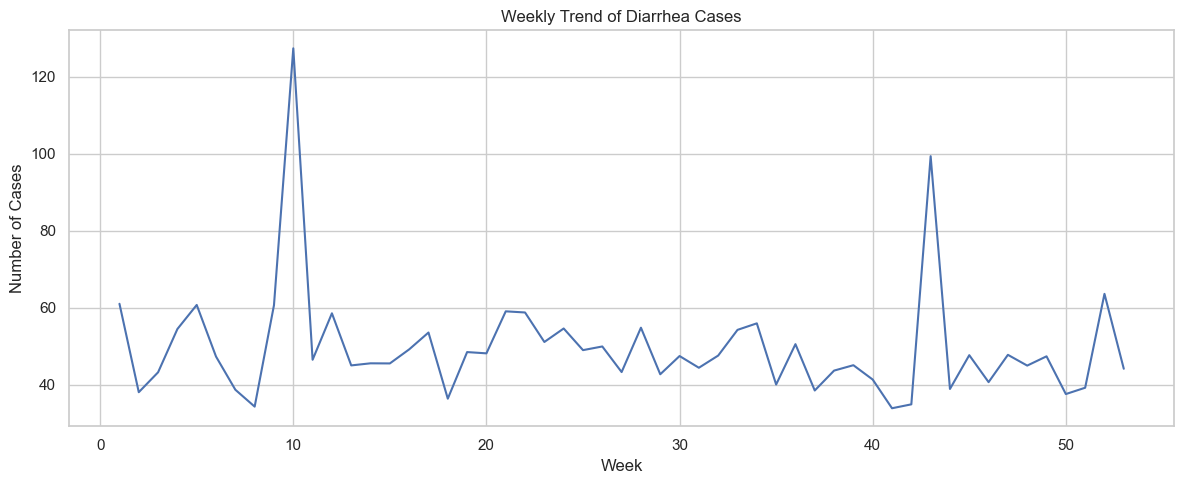

In [54]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Ensure week_of_outbreak is sorted
df_dia = df_dia.sort_values("week_of_outbreak")

# 1. Weekly Cases Trend
plt.figure(figsize=(12, 5))
#sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", ci=None)
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", errorbar=None)
plt.title("Weekly Trend of Diarrhea Cases")
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

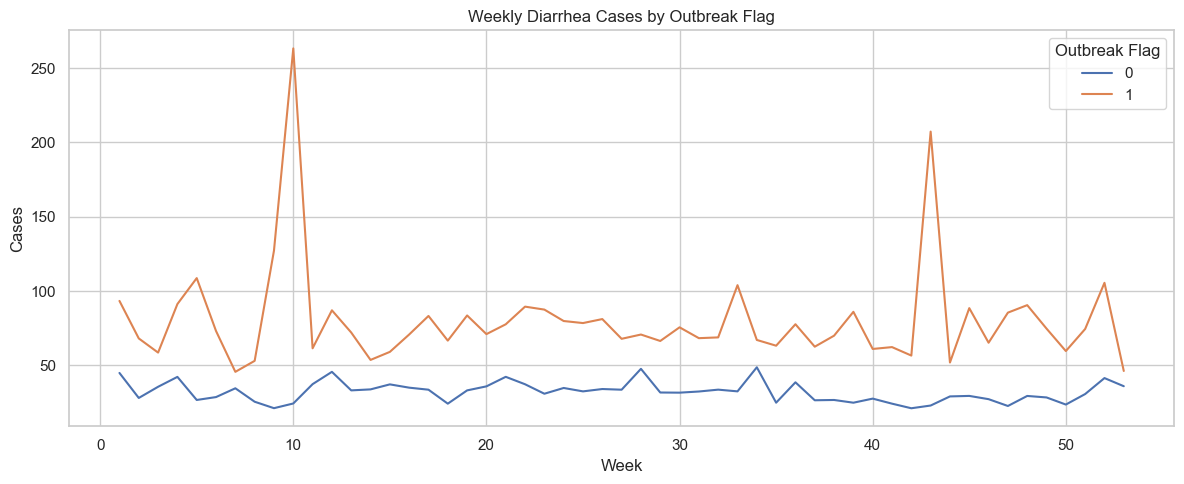

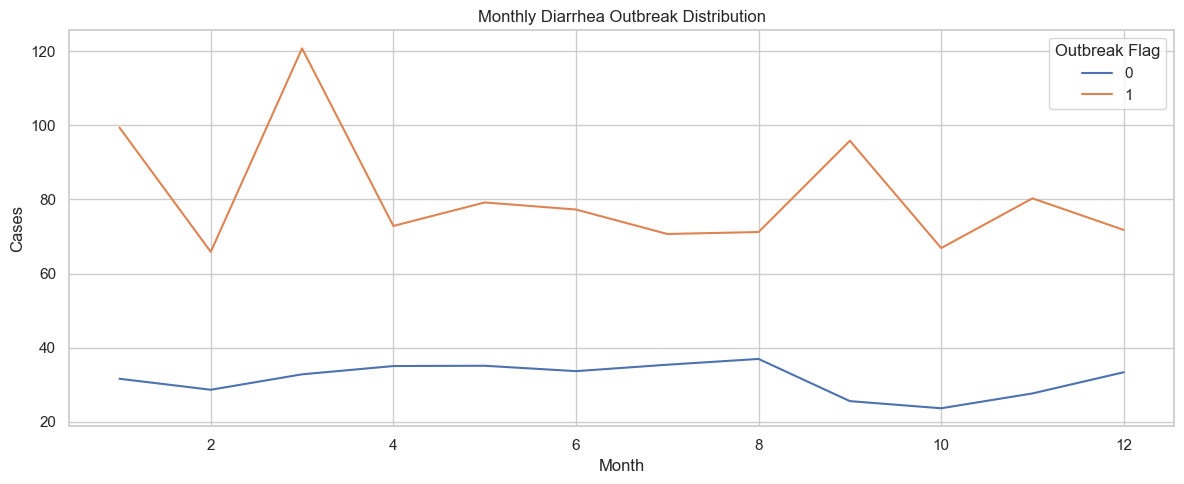

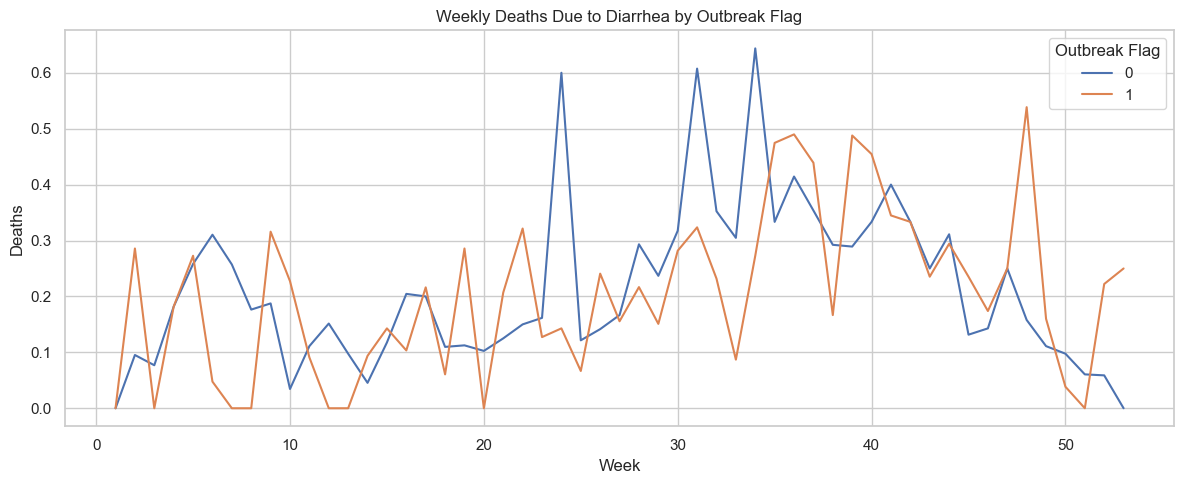

In [55]:

# Weekly Cases Trend by Outbreak Flag
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", hue="diar_outbreak_flag", errorbar=None)
plt.title("Weekly Diarrhea Cases by Outbreak Flag")
plt.xlabel("Week")
plt.ylabel("Cases")
plt.legend(title="Outbreak Flag")
plt.tight_layout()
plt.show()

# Monthly Outbreak Distribution
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_dia, x="month", y="Cases", hue="diar_outbreak_flag", errorbar=None)
plt.title("Monthly Diarrhea Outbreak Distribution")
plt.xlabel("Month")
plt.ylabel("Cases")
plt.legend(title="Outbreak Flag")
plt.tight_layout()
plt.show()

# Weekly Deaths Trend due to Diarrhea
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Deaths", hue="diar_outbreak_flag", errorbar=None)
plt.title("Weekly Deaths Due to Diarrhea by Outbreak Flag")
plt.xlabel("Week")
plt.ylabel("Deaths")
plt.legend(title="Outbreak Flag")
plt.tight_layout()
plt.show()


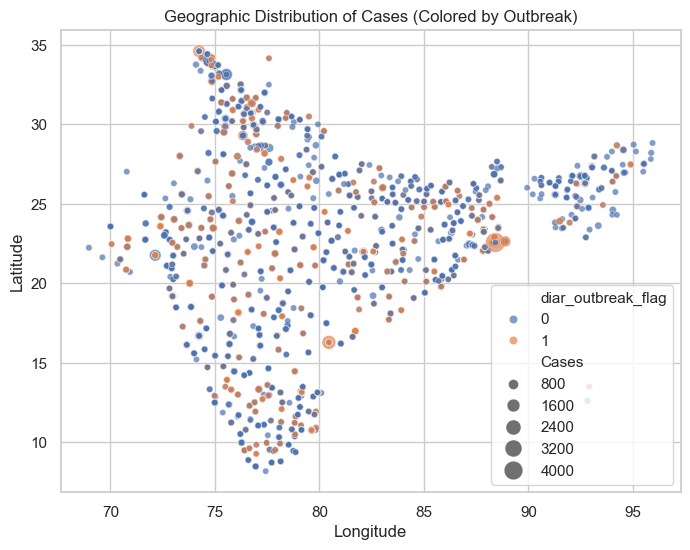

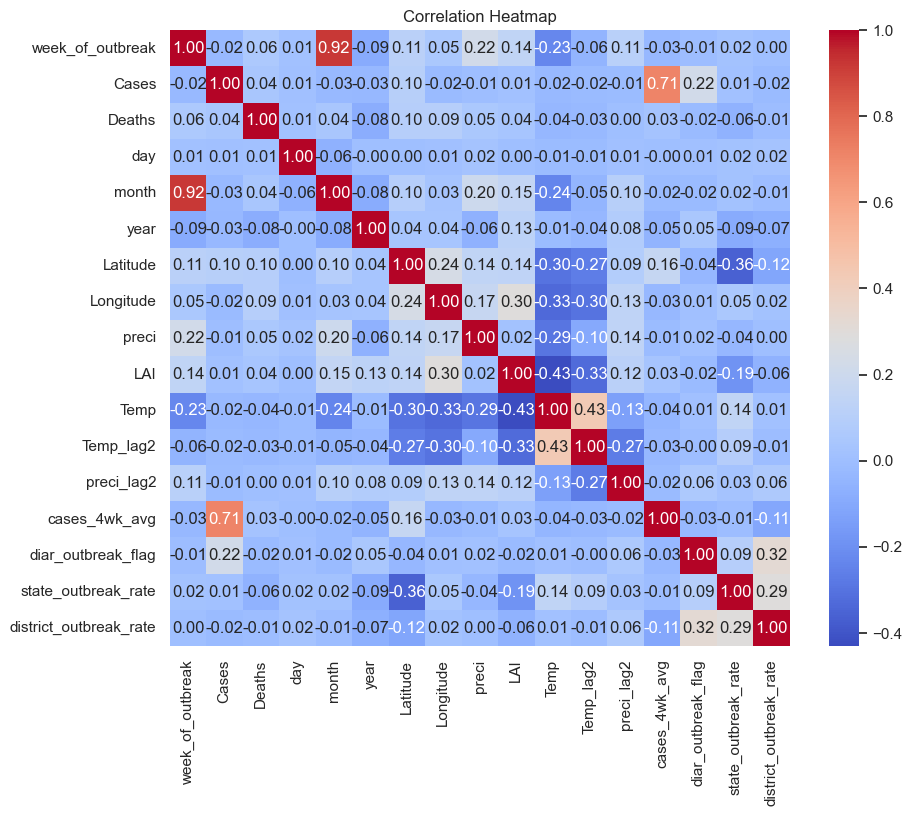

In [56]:
# -----------------------
# Geographic Scatter
# -----------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_dia, x="Longitude", y="Latitude", hue="diar_outbreak_flag", size="Cases", sizes=(20,200), alpha=0.7)
plt.title("Geographic Distribution of Cases (Colored by Outbreak)")
plt.show()

# -----------------------
# Correlation Heatmap
# -----------------------
plt.figure(figsize=(10,8))
sns.heatmap(df_dia.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Current Working Directory: C:\Users\shash\Downloads\ne_10m_admin_1_states_provinces


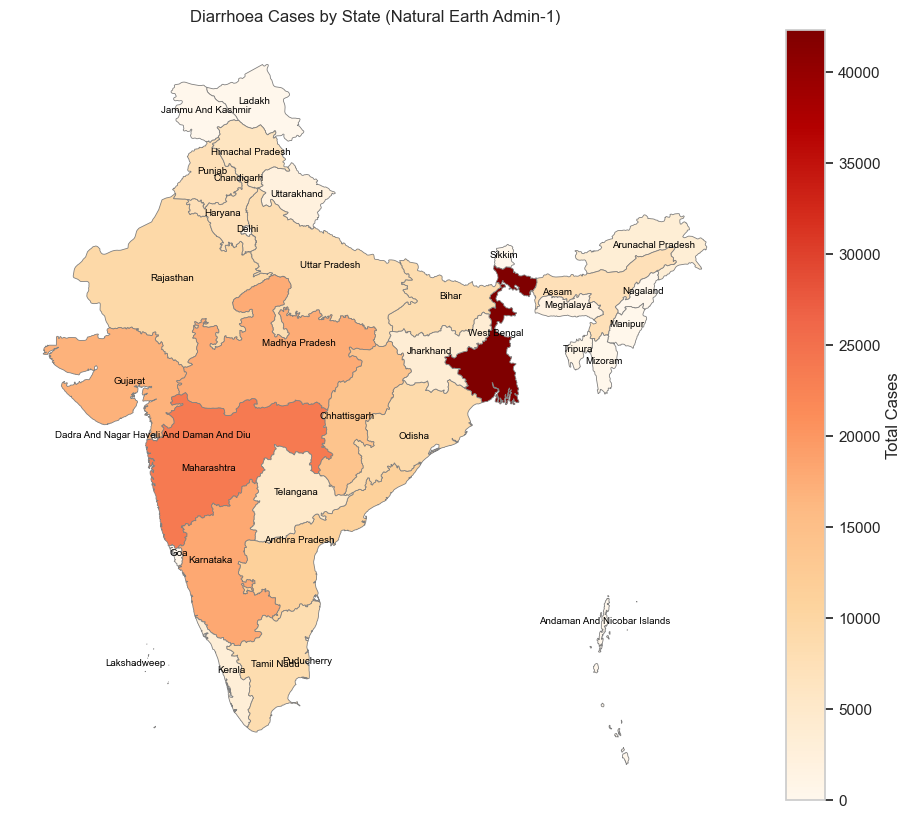

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ---- Step 1: Aggregate diarrhoea cases at state level ----
state_cases = (
    df_dia.groupby("state_ut")
    .agg({"Cases": "sum"})
    .reset_index()
)

working_folder = r"C:\Users\shash\Downloads\ne_10m_admin_1_states_provinces"

# Set the working directory
os.chdir(working_folder)

# Verify the change
print("Current Working Directory:", os.getcwd())

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Natural Earth Admin-1 shapefile
ne = gpd.read_file("./ne_10m_admin_1_states_provinces.shp")

# Keep only India states
ne_ind = ne[ne["admin"] == "India"][["name", "name_en", "postal", "iso_3166_2", "geometry"]].copy()
ne_ind["state_ut"] = ne_ind["name_en"].fillna(ne_ind["name"]).str.strip().str.title()

# Aggregate diarrhoea cases by state
state_cases = df_dia.groupby("state_ut", as_index=False)["Cases"].sum()

# Merge shape + cases
india_states = ne_ind.merge(state_cases, on="state_ut", how="left").fillna({"Cases": 0})

# Plot states colored by cases
fig, ax = plt.subplots(figsize=(12, 10))
india_states.plot(
    column="Cases",
    cmap="OrRd",
    linewidth=0.6,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Total Cases"},
    ax=ax
)

# Add state name labels at centroids
for idx, row in india_states.iterrows():
    # Use representative_point() so label is always inside polygon
    centroid = row["geometry"].representative_point()
    ax.text(
        centroid.x,
        centroid.y,
        row["state_ut"],
        fontsize=7,
        ha="center",
        color="black"
    )

plt.title("Diarrhoea Cases by State (Natural Earth Admin-1)")
plt.axis("off")
plt.show()

In [58]:
### West Bengal has highest diarrhea cases reported in India

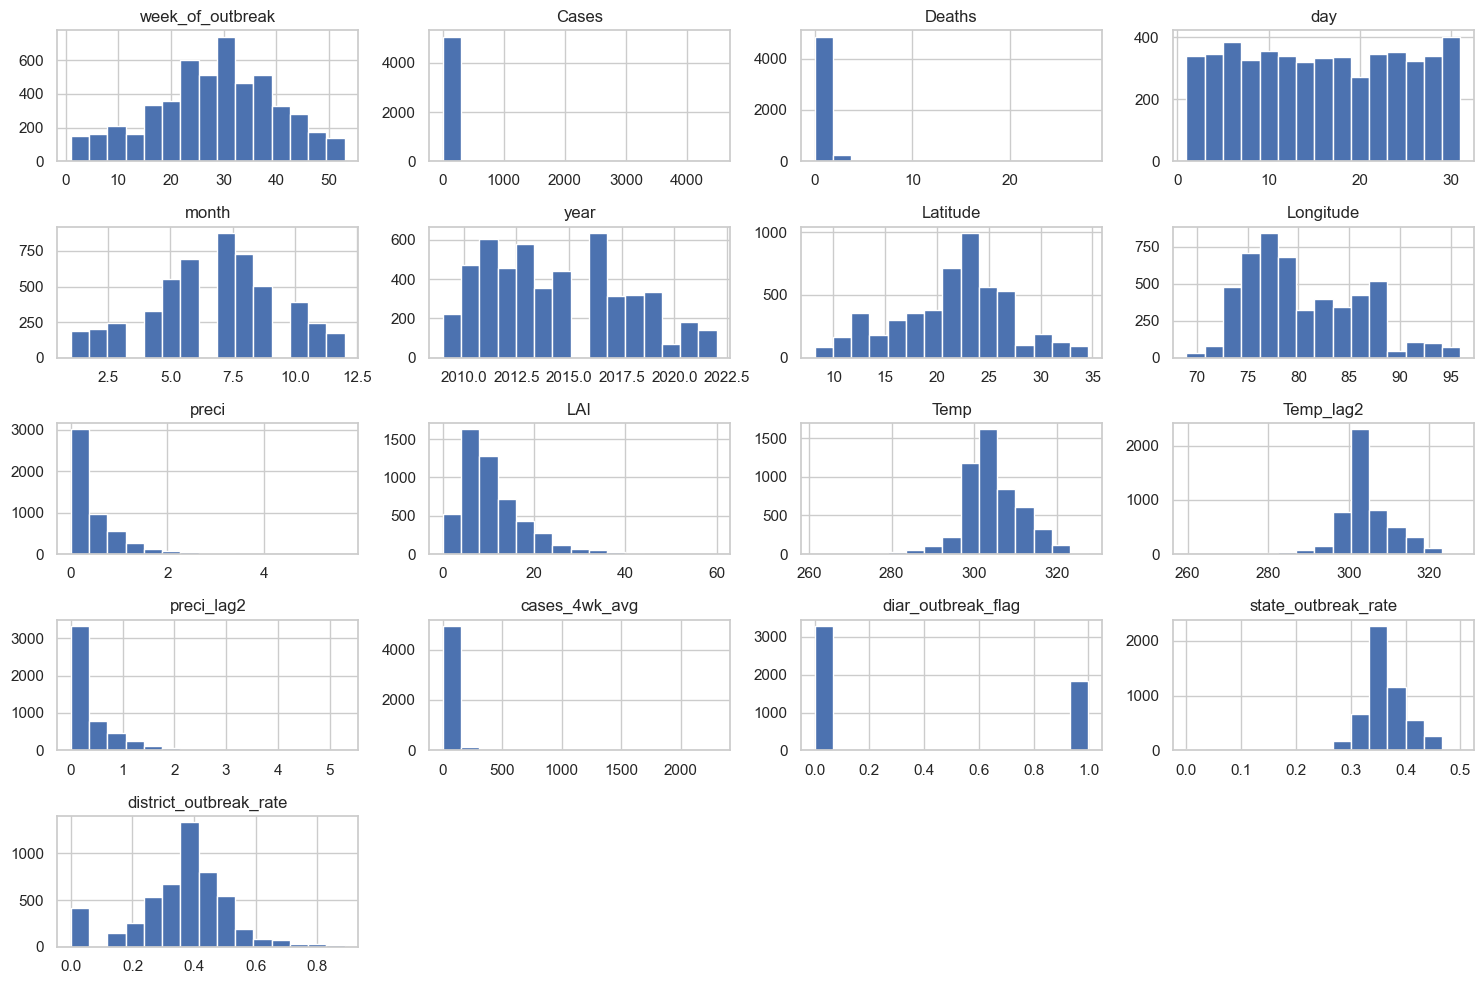

In [59]:
# Univariate Analysis
num_cols = df_dia.select_dtypes(include=['float64','int64']).columns
cat_cols = df_dia.select_dtypes(include=['object']).columns

# Histograms for numeric features
df_dia[num_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

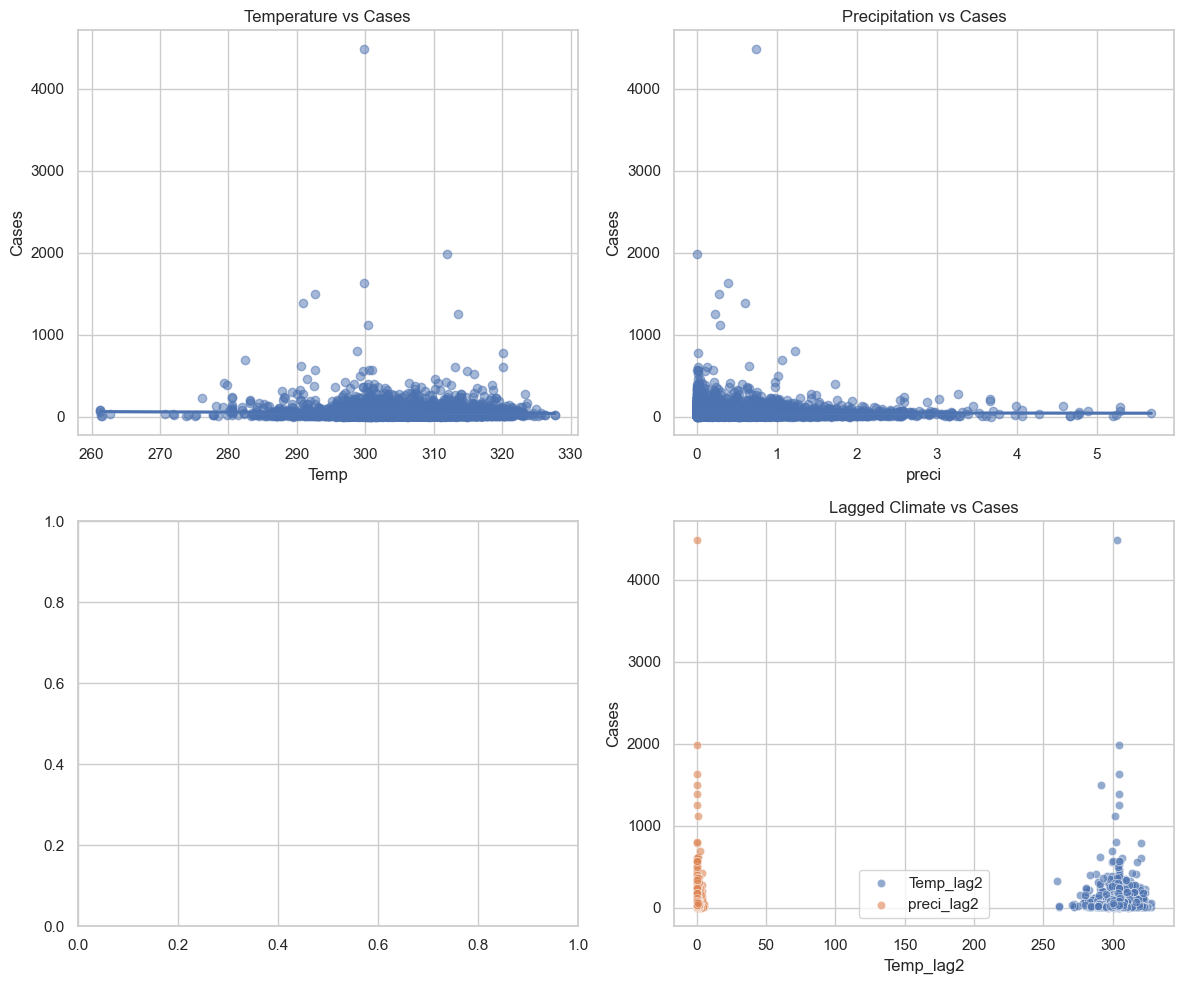

In [60]:
# Temperature vs Cases
fig, axs = plt.subplots(2, 2, figsize=(12,10))

sns.regplot(x="Temp", y="Cases", data=df_dia, ax=axs[0,0], scatter_kws={'alpha':0.5})
axs[0,0].set_title("Temperature vs Cases")

# Precipitation vs Cases
sns.regplot(x="preci", y="Cases", data=df_dia, ax=axs[0,1], scatter_kws={'alpha':0.5})
axs[0,1].set_title("Precipitation vs Cases")

# Lagged variables vs Cases
sns.scatterplot(x="Temp_lag2", y="Cases", data=df_dia, ax=axs[1,1], alpha=0.6, label="Temp_lag2")
sns.scatterplot(x="preci_lag2", y="Cases", data=df_dia, ax=axs[1,1], alpha=0.6, label="preci_lag2")
axs[1,1].legend()
axs[1,1].set_title("Lagged Climate vs Cases")

plt.tight_layout()
plt.show()

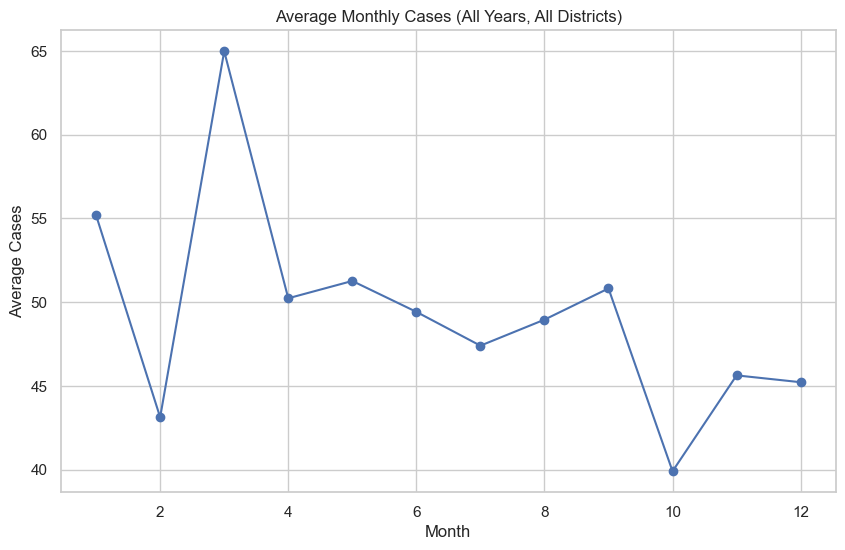

In [61]:
#  Average cases by month (across all districts and years)
df_monthly_avg = (
    df_dia.groupby("month")["Cases"]
    .mean()
    .reset_index()
)

#  Line plot
plt.figure(figsize=(10,6))
plt.plot(df_monthly_avg["month"], df_monthly_avg["Cases"], marker="o", linestyle="-")
plt.title("Average Monthly Cases (All Years, All Districts)")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.grid(True)
plt.show()

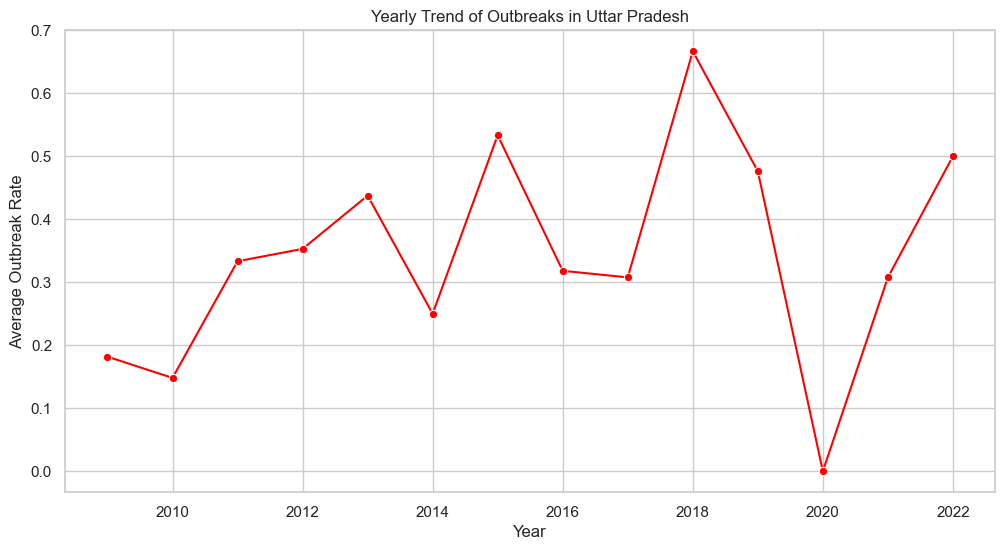

In [62]:
#### # Time trend of outbreaks in UP (yearly trend)

# Filter only Uttar Pradesh
df_up = df_dia[df_dia["state_ut"].str.lower() == "uttar pradesh"]


plt.figure(figsize=(12,6))
sns.lineplot(data=df_up.groupby(["year"])["diar_outbreak_flag"].mean().reset_index(),
             x="year", y="diar_outbreak_flag", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Average Outbreak Rate")
plt.title("Yearly Trend of Outbreaks in Uttar Pradesh")
plt.show()

###############################################################################
####       Correlation Analysis
##################################################################################



#### | Feature Type    | Correlation Method Used        | Description                                            |
#### | --------------- | ------------------------------ | ------------------------------------------------------ |
#### | **Numeric**     | **Point-Biserial** correlation | Special case of Pearson for binary vs numeric          |
#### | **Categorical** | **Cramér’s V**                 | Measures association between two categorical variables |


In [63]:
### Numeric Target (not the case here): Pearson and Spearman for numeric-numeric.

### Correlation Ratio (η) for categorical-numeric.

In [64]:


# --- Helper functions ---
def correlation_ratio(categories, values):
    """Correlation ratio (eta) for categorical-numeric association."""
    categories = np.array(categories)
    values = np.array(values)
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_values = values[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    ss_between = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    ss_total = np.sum((values - y_total_avg) ** 2)
    return np.sqrt(ss_between / ss_total)

def cramers_v(x, y):
    """Cramér's V for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# --- Main correlation function ---
def mixed_correlation_analysis(df, target_col, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    
    results = []
    target = df[target_col]
    target_type = "numeric" if pd.api.types.is_numeric_dtype(target) else "categorical"
    
    for col in df.columns:
        if col == target_col or col in exclude_cols:
            continue
        
        col_data = df[col]
        if col_data.isnull().all():
            continue
        
        # Drop NaNs only for the specific pair
        valid_idx = target.notna() & col_data.notna()
        if valid_idx.sum() == 0:
            continue
        col_data = col_data[valid_idx]
        target_clean = target[valid_idx]
        
        # Detect variable type
        if pd.api.types.is_numeric_dtype(col_data):
            col_type = "numeric"
        else:
            col_type = "categorical"
        
        corr_val = None
        p_val = None
        
        # Numeric target
        if target_type == "numeric":
            if col_type == "numeric":
                corr_val, p_val = pearsonr(target_clean, col_data)
                corr_spearman, p_spearman = spearmanr(target_clean, col_data)
                results.append((col, "Pearson", corr_val, p_val))
                results.append((col, "Spearman", corr_spearman, p_spearman))
            else:
                corr_val = correlation_ratio(col_data, target_clean)
                results.append((col, "Correlation Ratio (eta)", corr_val, np.nan))
        
        # Categorical target
        else:
            if col_type == "numeric":
                if target_clean.nunique() == 2:
                    target_binary = target_clean.astype("category").cat.codes
                    corr_val, p_val = pointbiserialr(target_binary, col_data)
                    results.append((col, "Point-Biserial", corr_val, p_val))
                else:
                    corr_val = correlation_ratio(target_clean, col_data)
                    results.append((col, "Correlation Ratio (eta)", corr_val, np.nan))
            else:
                corr_val = cramers_v(col_data, target_clean)
                results.append((col, "Cramér’s V", corr_val, np.nan))
    
    return pd.DataFrame(results, columns=["Feature", "Method", "Correlation", "p-value"])

# --- Example usage ---
# Columns to ignore in correlation (date, IDs, etc.)
exclude_columns = ["week_start_date", "Cases", "Disease","year","cases_4wk_avg"]

# Run correlation for diarrhoea outbreak flag
# df = pd.read_csv("epiclim_outbreak.csv")
df_corr2 = df_dia.copy()
result_table = mixed_correlation_analysis(df_corr2, target_col="diar_outbreak_flag", exclude_cols=exclude_columns)

# Sort by absolute correlation
result_table = result_table.sort_values(by="Correlation", key=np.abs, ascending=False)
print(result_table)


                   Feature                   Method  Correlation  \
26  district_outbreak_rate                  Pearson     0.323150   
3                 district  Correlation Ratio (eta)     0.322508   
27  district_outbreak_rate                 Spearman     0.301587   
23              preci_lag2                 Spearman     0.131597   
24     state_outbreak_rate                  Pearson     0.094859   
2                 state_ut  Correlation Ratio (eta)     0.094859   
25     state_outbreak_rate                 Spearman     0.079636   
22              preci_lag2                  Pearson     0.055640   
11                Latitude                 Spearman    -0.038717   
10                Latitude                  Pearson    -0.037749   
5                   Deaths                 Spearman    -0.032320   
16                     LAI                  Pearson    -0.022862   
8                    month                  Pearson    -0.019339   
9                    month                 Spear

In [65]:
###  Correlation: Strength & direction of relationship (ranges -1 to +1).

### p-value: Significance of the result. Typically, p < 0.05 is considered statistically significant.

## Method: Correlation method based on variable type (Pearson, Spearman, Correlation Ratio)

##Stronger indicators: District outbreak rate, District and state: Suggest geographic hotspots.

## Precipitation lag (2 weeks): Indicates outbreaks may be delayed responses to rainfall.

## Weak/no indicators: Temperature, vegetation, current rainfall, day/month/week: No strong or consistent signals.

## Deaths: Weak signal, possibly affected by low reporting granularity.

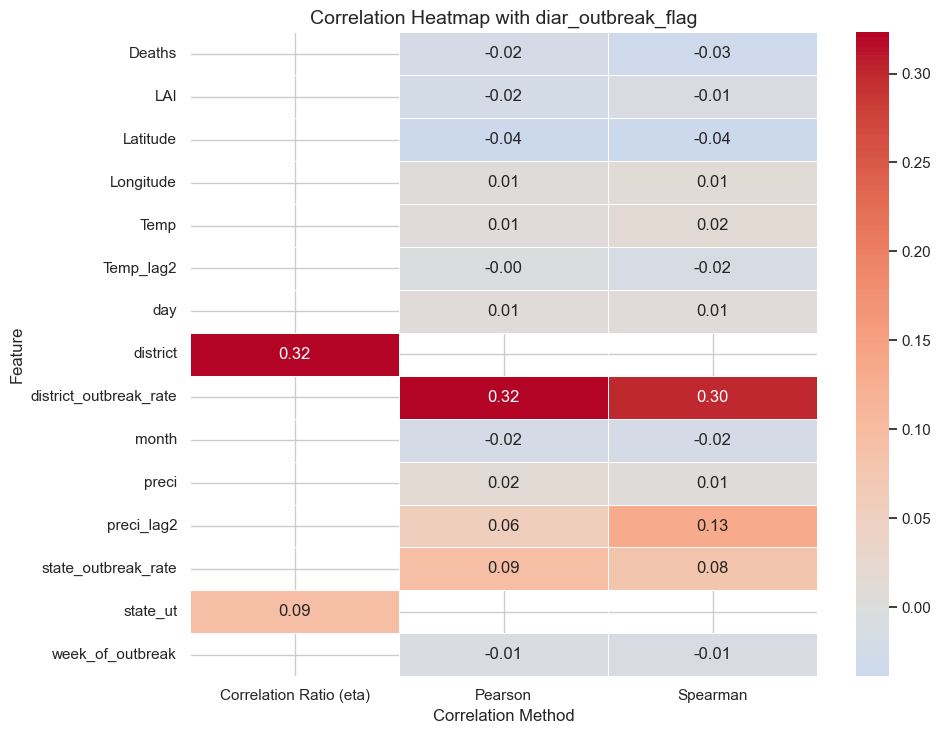

In [66]:
# Pivot table: Features x Method
heatmap_data = result_table.pivot(
    index="Feature", 
    columns="Method", 
    values="Correlation"
)

# Create heatmap
plt.figure(figsize=(10, len(heatmap_data) * 0.5))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    fmt=".2f", 
    linewidths=0.5
)
plt.title("Correlation Heatmap with diar_outbreak_flag", fontsize=14)
plt.xlabel("Correlation Method")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [67]:


# Assuming df is your DataFrame
dfchi = df_dia.copy()  # Use the actual DataFrame here

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['state_ut', 'district', 'Disease']

for col in categorical_cols:
    dfchi[col] = label_encoder.fit_transform(dfchi[col])

# 1. Convert numerical columns to discrete (bins)
# We can discretize continuous variables (e.g., 'Latitude', 'Longitude', etc.) into bins, if necessary
# Here, we convert a few numerical features into categorical (bins) for testing purposes
dfchi['Temp_binned'] = pd.cut(dfchi['Temp'], bins=5, labels=[0, 1, 2, 3, 4])
dfchi['preci_binned'] = pd.cut(dfchi['preci'], bins=5, labels=[0, 1, 2, 3, 4])

# 2. Prepare features and target for Chi-Square Test
X = dfchi.drop(columns=['diar_outbreak_flag', 'week_start_date', 'Cases','cases_4wk_avg', 'year'])
y = dfchi['diar_outbreak_flag']

# 3. Apply Chi-Square test
chi2_results = []
for column in X.columns:
    # Create contingency table
    contingency_table = pd.crosstab(X[column], y)
    
    # Perform Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append((column, chi2_stat, p_val))

# Convert results to a DataFrame for easier viewing
chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2 Stat', 'P-Value'])


# Display features with p-values below a threshold (e.g., 0.05)


print("\nChi-Square Test Results with P-Value < 0.05:")
print(chi2_results_df[chi2_results_df['P-Value'] < 0.05].sort_values(by='P-Value'))


chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to show the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stats,
    'P-Value': p_values
})

# Sort by Chi-Square statistic
chi2_results = chi2_results.sort_values(by='Chi2 Stat', ascending=False)

# Print all results
print("\n\nChi-Square Test Results for all features:")
print(chi2_results)


Chi-Square Test Results with P-Value < 0.05:
                   Feature    Chi2 Stat       P-Value
15  district_outbreak_rate   535.393069  1.011328e-67
13              preci_lag2  4175.473751  2.616868e-05
12               Temp_lag2  3503.078061  9.475554e-05
4                   Deaths    28.849763  2.395005e-03
0         week_of_outbreak    79.127964  9.026343e-03
14     state_outbreak_rate    46.134160  1.687908e-02


Chi-Square Test Results for all features:
                   Feature  Chi2 Stat       P-Value
15  district_outbreak_rate  35.876887  2.101874e-09
13              preci_lag2  14.767830  1.215923e-04
10                     LAI  12.855265  3.365311e-04
7                 Latitude  10.236990  1.376520e-03
4                   Deaths   5.947251  1.474026e-02
2                 district   3.268988  7.060117e-02
17            preci_binned   2.245068  1.340410e-01
1                 state_ut   2.193397  1.386033e-01
5                      day   1.997878  1.575196e-01
6           

Here is the list of features which can be considered as predictors influencing the outbreak based on combination of Chr-square test, Pearson method and Correlation ratio:
•	district_outbreak_rate (very strong predictor, χ² = 535, p  0.001, corr > 0.3)
•	state_outbreak_rate (moderate predictor, significant in Pearson/Spearman, χ² = 46, p < 0.05)
•	preci_lag2 (very strong, χ² = 4175, p ≪ 0.001, corr > 0.13)
•	Temp_lag2 (strong in χ² = 3503, p ≪ 0.001, though weaker in correlation)
•	Deaths (χ² = 28.8, p < 0.01, weak correlation but epidemiologically relevant)
•	week_of_outbreak (χ² = 79, p < 0.01, seasonality signal)
•	Latitude (weak correlation but significant in χ² = 10.2, p < 0.01. This feature indicates different climatic zones which can influence the outbreak.
•	LAI (Land–Atmospheric Interaction index, χ² = 12.8, p < 0.001. This feature inferences the ecological relevance for outbreak.

Note that longitude & State are weak statistical predictors influencing the outbreak. Longitude alone doesn’t explain outbreak patterns. Disease spread isn’t directly tied to east–west position. Instead, climate features (Temp, Precipitation) and district-specific outbreak rates explain risk better. Longitude adds little predictive power. Using state as a feature risks leakage / confounding. Outbreak risk is better explained at district level (finer granularity).

It can be concluded from above different correlation analysis for both continuous and categorical features that:
•	Outbreaks are location and climate-lag-driven.
•	Direct/instantaneous values (like current temp/precip) are weak; lag effects matter more for outbreak modelling.
•	ML model for diarrhoea prediction shall prioritize lagged climate features + past outbreak rates.

Hence, we can conclude that H₀ (Null Hypothesis) for research question #1 “Climate, environmental, and geographical variables do not significantly influence disease outbreaks at the district level” can be considered as rejected. 


In [68]:
#### ML Modelling 
####

In [69]:
##### ML Modelling for Outbreak Prediction

In [70]:
### Model no. 1 
### Use power of confidence dervied samples for modelling using all features to determine diarrheo outbreak 

# -----------------------------
# Copy diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)



print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak' 
## Added cyclical encoding (week_sin, week_cos) for week_of_outbreak.
## It takes values 1–52, representing the week number within a year.
## It is cyclical/seasonal in nature → week 1 and week 52 are close in time, 
## but if treated as plain integers, models will incorrectly assume they are far apart.

df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

drop_cols = ["state_ut", "district", "Disease", "week_start_date","week_of_outbreak", "year","day","month", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

print("Sampled dataset as input features shape:", X.shape)

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64
Sampled dataset as input features shape: (330, 14)


C:\Users\shash\AppData\Local\Temp\ipykernel_53668\632347822.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.95      0.79      0.86        24

    accuracy                           0.91        66
   macro avg       0.92      0.88      0.90        66
weighted avg       0.91      0.91      0.91        66

ROC-AUC: 0.9682539682539683



Top 10 Important Features:
                   Feature  Importance
0                    Cases    0.311842
10  district_outbreak_rate    0.125291
8            cases_4wk_avg    0.099377
7               preci_lag2    0.066046
13                week_cos    0.058799
5                     Temp    0.051748
6                Temp_lag2    0.047533
2                 Latitude    0.044721
11        district_encoded    0.044197
3                    preci    0.042403


C:\Users\shash\AppData\Local\Temp\ipykernel_53668\3444370922.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


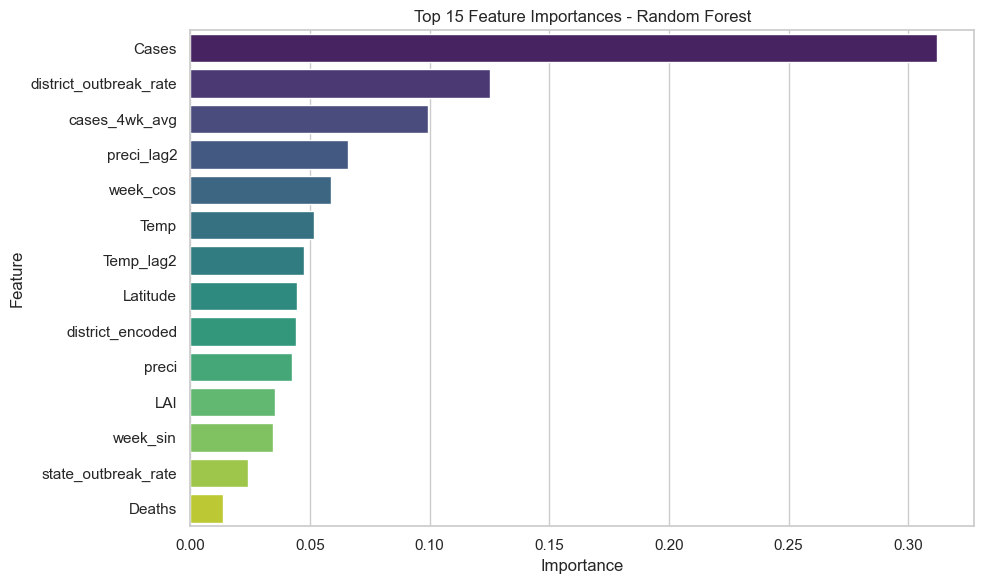

In [71]:
# -----------------------------
#  Feature Importance
# -----------------------------

# Get feature names (after dropping original columns and encoding)
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

Direct epidemiological drivers dominate

Current cases and recent 4-week average are most important
the model relies heavily on case surveillance data to detect outbreaks.This aligns with how outbreaks are typically defined (sudden rise in cases above baseline).

Spatial and historical context matters
district_outbreak_rate and district_encoded highlight that districts with a history of outbreaks are more prone to future outbreaks.
Geographic coordinates (latitude) also help capture spatial variation.

Climate signals are meaningful but secondary
Precipitation (lagged and current) and temperature (current and lagged) together account for ~20% importance.
Shows outbreaks are influenced by weather patterns with both immediate and lagged effects.

Seasonality captured explicitly
week_cos is important (~6%), confirming that outbreaks follow seasonal cycles (e.g., monsoon, post-monsoon).

In [72]:
### Model no. 2 
### Use power of confidence dervied samples for modelling using all features to determine diarrheo outbreak 
### Remove cases, 4 week case avg as outbreak definition is derived from cases and 4 week avg cases


# -----------------------------
# Copy diarrhoea diarrhoea dataset
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
#  Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# Additional Feature Engineering & Preprocessing
# -----------------------------

# Cyclical encoding for 'week_of_outbreak' 
## Added cyclical encoding (week_sin, week_cos) for week_of_outbreak.
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

# Label encoding categorical vars
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])


# Drop raw categorical/date cols (keep encoded + engineered)
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "week_of_outbreak", "Longitude","Cases", "cases_4wk_avg",  "day", "year","month"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 7. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_53668\2883550022.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        42
           1       0.56      0.42      0.48        24

    accuracy                           0.67        66
   macro avg       0.63      0.61      0.62        66
weighted avg       0.65      0.67      0.65        66

ROC-AUC: 0.7321428571428572


In [73]:
#1.	The model is biased toward the majority class (no outbreak). It tends to under-predict outbreaks.
#2.	Outbreak recall is low (0.42). This is a red flag in epidemiology because it means many outbreaks are missed.
#3.	The moderate ROC-AUC (0.73) suggests there is signal in the features, but the model is not learning it effectively.



Top 10 Important Features:
                   Feature  Importance
8   district_outbreak_rate    0.185176
6               preci_lag2    0.111889
10                week_cos    0.090448
4                     Temp    0.087769
5                Temp_lag2    0.087096
1                 Latitude    0.082772
2                    preci    0.082386
11        district_encoded    0.070532
3                      LAI    0.067444
9                 week_sin    0.060687


C:\Users\shash\AppData\Local\Temp\ipykernel_53668\241786306.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


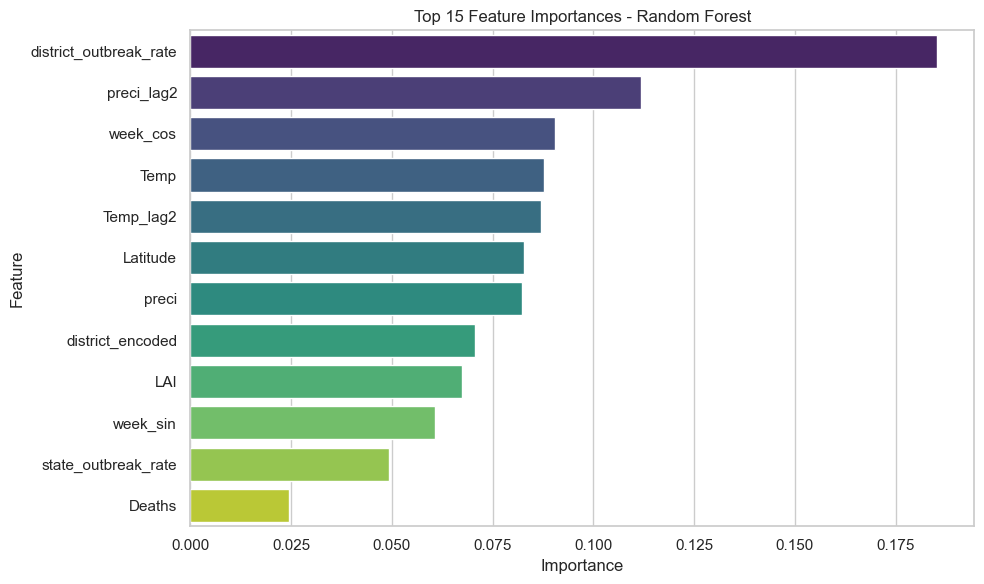

In [74]:
# -----------------------------
#  Feature Importance
# -----------------------------

# Get feature names (after dropping original columns and encoding)
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


•	Historical outbreak intensity (district_outbreak_rate) and climate factors (precipitation, temperature, lags). Example: preci_lag2 suggests rainfall patterns two weeks prior are strongly linked to diarrhoeal outbreaks, likely due to water contamination, stagnant water, and delayed environmental effects. 
•	Warm conditions identified temperature feaures can worsen water contamination and bacterial growth. This confirms the strong spatio-temporal and climate linkage in outbreak dynamics.
•	Seasonality: Week-of-year encoding (sin/cos) appears prominently, showing outbreaks are not random but seasonal.
•	Geographical context: Latitude and district effects show that location-specific vulnerability plays a role (e.g., sanitation infrastructure, regional climate).
•	Environmental indicators: LAI connects to ecosystem dynamics, relevant for mosquito-borne diseases, showing cross-disease influence.


In [75]:
#### 
### 
## Previously with lower recall and accuacy, the model had overall weak performance on outbreak detection.
## The model struggles with the minority class, which is critical in public health applications.


In [76]:
### Model 3 : Lets try with XGBoost Model


# -----------------------------
# 1. Filter for given state (example already pre-filtered)
# -----------------------------
df_xgsample = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_xgsample)  # population size
p = df_xgsample["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_xgsample.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features 
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak' 
## Added cyclical encoding (week_sin, week_cos) for week_of_outbreak.
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)


drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "month","week_of_outbreak", "year", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]
print("Sampled preprocessed dataset shape:", X.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train XGBoost model
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # imbalance ratio

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64
Sampled preprocessed dataset shape: (330, 12)


C:\Users\shash\AppData\Local\Temp\ipykernel_53668\2319315687.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_xgsample.groupby("diar_outbreak_flag", group_keys=False).apply(
C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        42
           1       0.53      0.42      0.47        24

    accuracy                           0.65        66
   macro avg       0.61      0.60      0.60        66
weighted avg       0.64      0.65      0.64        66

ROC-AUC: 0.7142857142857143


1.	The model is biased toward the majority class (no outbreak). It tends to under-predict outbreaks.
2.	Outbreak recall is low (0.46). This is a red flag in epidemiology because it means many outbreaks are missed.
3.	The moderate ROC-AUC (0.73) suggests there is signal in the features, but the model is not learning it effectively.


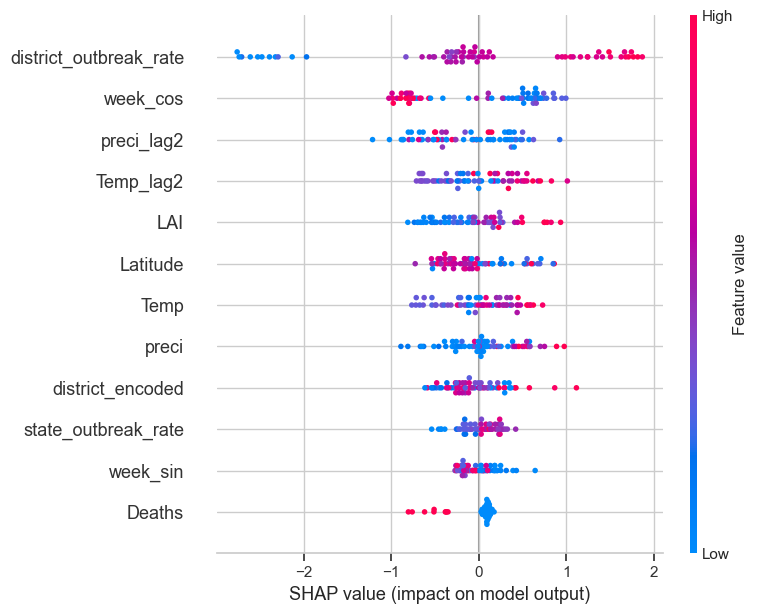

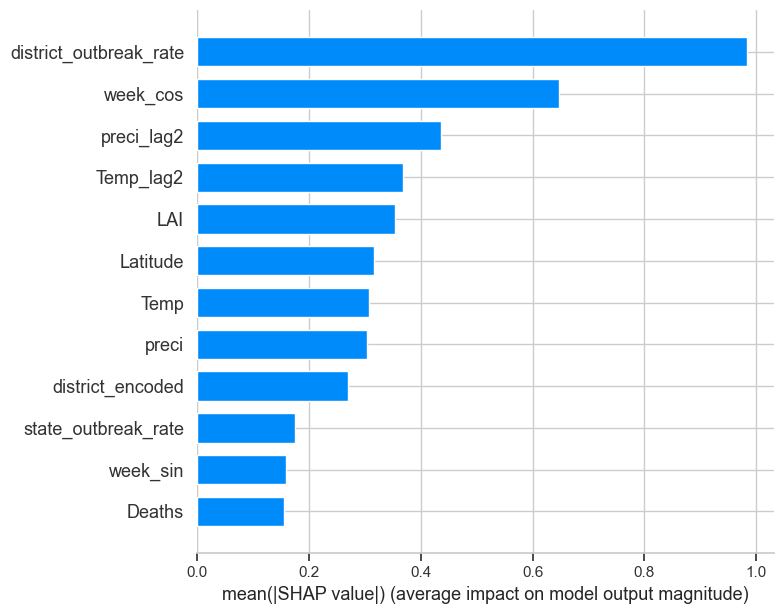

In [77]:
# -----------------------------
# SHAP Feature Importance and Plot
# -----------------------------
import shap

# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP values (Summary plot) with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Alternatively, you can also plot the bar chart for feature importance with actual feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)



In [78]:


# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Convert SHAP values into a DataFrame (no index issue now)
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Print first few rows of SHAP values for debugging/inspection
print("SHAP values (first 10 rows):")
print(shap_df.head(10))

# Calculate mean absolute SHAP value per feature (global importance)
shap_importance = shap_df.abs().mean().sort_values(ascending=False)
print("\nMean absolute SHAP values (global feature importance):")
print(shap_importance)




SHAP values (first 10 rows):
     Deaths  Latitude     preci       LAI      Temp  Temp_lag2  preci_lag2  \
0  0.109373  0.247699  0.389233 -0.655801  0.365454   0.187059    0.148420   
1  0.137664  0.293180 -0.262881  0.444587  0.377640   0.678498    0.105365   
2  0.108556  0.375875 -0.649352 -0.204065 -0.393784   0.443150   -0.796804   
3  0.089714 -0.384875  0.556983  0.747494  0.017097  -0.486352   -0.859448   
4  0.110650  0.710387  0.025888 -0.128264  0.060626   0.282423    0.166076   
5  0.100844  0.072349  0.977298 -0.626851 -0.038555   0.488384    0.376585   
6  0.081877  0.601404  0.010420  0.182450 -0.006504   0.339744    0.134855   
7  0.110768 -0.099169 -0.046551 -0.556014  0.001269  -0.241856    0.018467   
8  0.097374 -0.285164  0.889549 -0.669496  0.049612   0.618966    0.479239   
9 -0.381218 -0.436239 -0.512053 -0.377325 -0.533688   0.337322    0.405650   

   state_outbreak_rate  district_outbreak_rate  district_encoded  week_sin  \
0             0.233277            

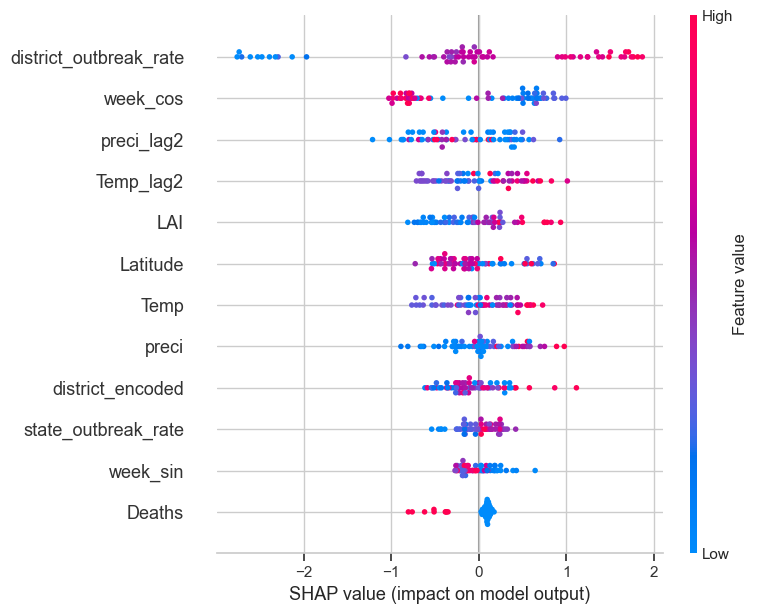

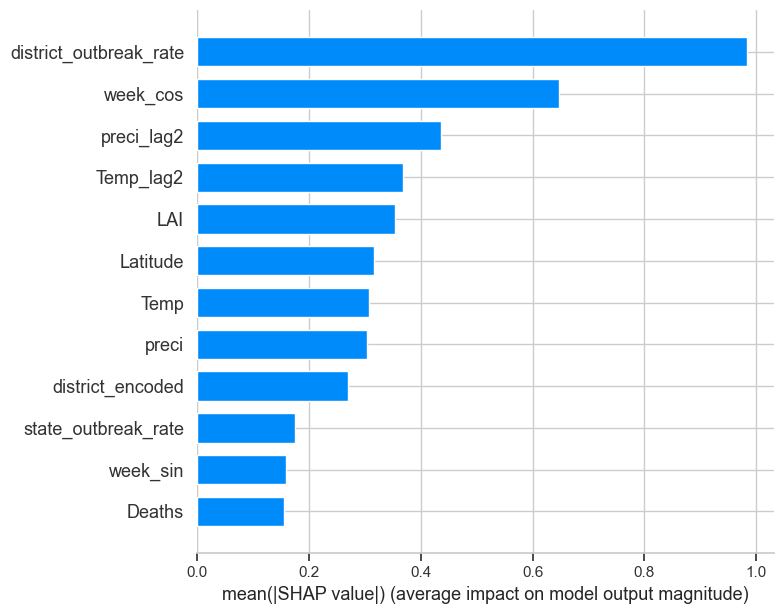

In [79]:

# Plot SHAP values (Summary plot - beeswarm)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Plot SHAP values (Bar chart of mean absolute importance)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

•	Historical Persistence: Outbreaks strongly repeat in historically vulnerable districts. This may highlight the need for structural public health interventions in those hotspots.
•	Seasonality: Strong week-of-year signal shows diarrhoea is a seasonal epidemic, linked to rainfall & temperature cycles.
•	Lagged Weather Effects: Both rainfall and temperature 2 weeks earlier matter more than current values. This is consistent with incubation/environmental contamination delay.
•	Geographic/Environmental Context: LAI + Latitude + District encoding suggest environment + location + infrastructure jointly shape outbreak risk.
•	Deaths are weak predictors. It means that mortality does not drive outbreak prediction, possibly due to reporting bias or lag.


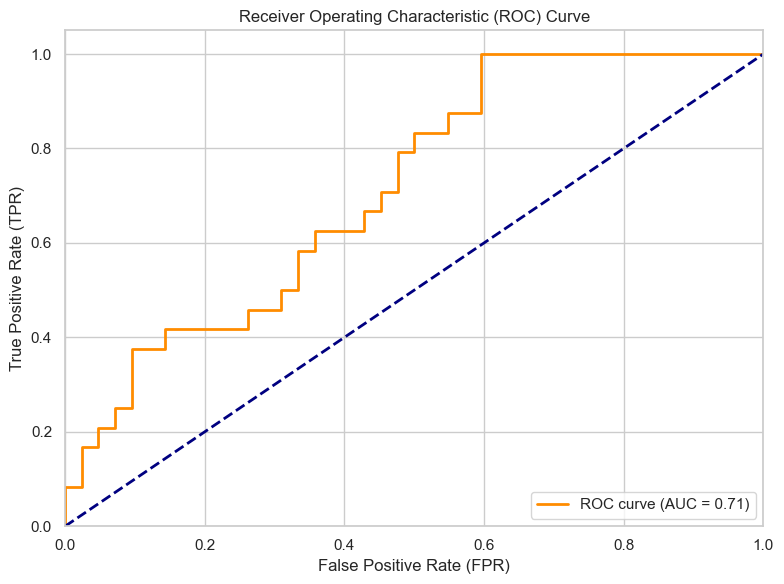

In [80]:


# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
#### Add randomized Search CV to see if performance improves ..........
## Model #4 RandomForestClassifer with randomized search CV.
# -----------------------------
#  Load and sample data
# -----------------------------

### This code has threhold tuned for maximum f1 score to avoid lower recall.
## 

df_sampled = df_dia.copy()

N = len(df_sampled)
p = df_sampled["diar_outbreak_flag"].mean()
Z = 1.96  # 95% confidence level
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocessing
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak'
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", 
             "cases_4wk_avg", "day", "month", "week_of_outbreak", "year", "Longitude"]

X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. RandomizedSearchCV for Random Forest
# -----------------------------
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None],
    "class_weight": ['balanced', 'balanced_subsample']
}

base_model = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

# -----------------------------
# 5. Best Model Evaluation
# -----------------------------
best_model = search.best_estimator_

y_prob = best_model.predict_proba(X_test)[:, 1]

# -----------------------------
# 6. Threshold tuning
# -----------------------------
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Choose threshold that maximizes F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nOptimal Threshold (based on F1): {best_threshold:.3f}")

# Apply threshold
y_pred_custom = (y_prob >= best_threshold).astype(int)

# Final evaluation
print("\nClassification Report (Threshold Tuned):")
print(classification_report(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\shash\AppData\Local\Temp\ipykernel_53668\1018484250.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Optimal Threshold (based on F1): 0.327

Classification Report (Threshold Tuned):
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        42
           1       0.48      1.00      0.65        24

    accuracy                           0.61        66
   macro avg       0.74      0.69      0.60        66
weighted avg       0.81      0.61      0.59        66

ROC-AUC: 0.7083333333333334


In [82]:


### The tuned threshold prioritizes catching all outbreaks (recall = 1.0) at the cost of many false positives (low precision for outbreak class) 
##### and misclassification of safe weeks. This is acceptable for public health surveillance, 
### where missing an outbreak is riskier than raising extra alerts.


Top Features by Importance:
                   Feature  Importance
8   district_outbreak_rate    0.283744
6               preci_lag2    0.112305
11                week_cos    0.101032
5                Temp_lag2    0.079000
4                     Temp    0.077013
1                 Latitude    0.068575
2                    preci    0.062770
9         district_encoded    0.056091
10                week_sin    0.051075
7      state_outbreak_rate    0.043247
3                      LAI    0.041175
0                   Deaths    0.023972


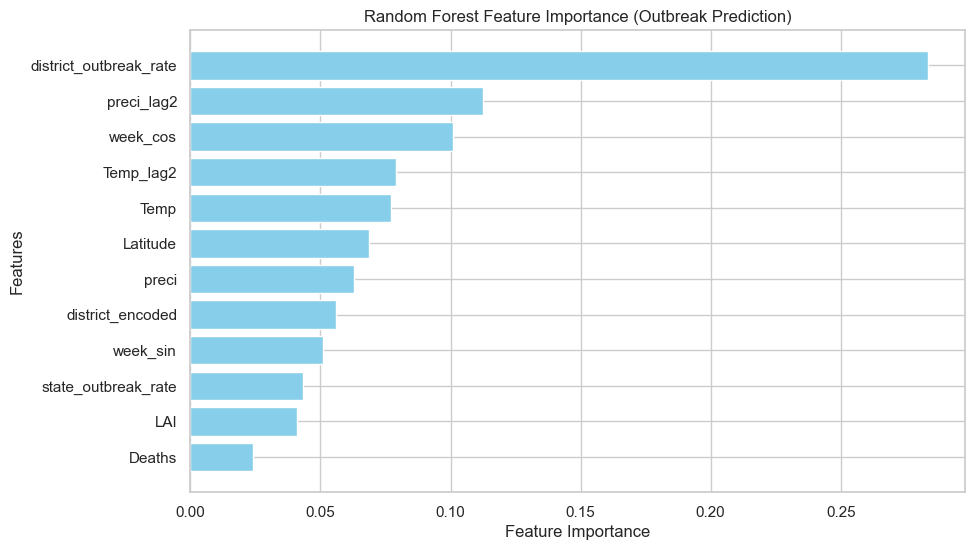

In [83]:

# -----------------------------
# 7. Feature Importance
# -----------------------------
# Get feature names (since X was scaled, we need to recover column names)
feature_names = X.columns  

# Extract feature importances
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop Features by Importance:")
print(importance_df)

# -----------------------------
# 8. Plot Feature Importance
# -----------------------------
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()  # Highest at top
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance (Outbreak Prediction)")
plt.show()


In [84]:
### model # 5 Randomforest classifer with increased sample size of total diarreheo outbreak records with oversampling using SMOTE to address calss imbalance.. and more data

df_sampled = df_dia.copy()

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocessing
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak'
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", 
             "cases_4wk_avg", "day", "month", "week_of_outbreak", "year", "Longitude"]

X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Apply SMOTE to training data only
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, training dataset shape: {X_train_res.shape}")
print(f"Training target distribution after SMOTE:\n{pd.Series(y_train_res).value_counts(normalize=True)}")

# -----------------------------
# 5. RandomizedSearchCV for Random Forest
# -----------------------------
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None],
    "class_weight": ['balanced', 'balanced_subsample']
}

base_model = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_res, y_train_res)

# -----------------------------
# 5. Best Model Evaluation
# -----------------------------
best_model = search.best_estimator_

y_prob = best_model.predict_proba(X_test)[:, 1]

# -----------------------------
# 6. Threshold tuning
# -----------------------------
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Choose threshold that maximizes F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nOptimal Threshold (based on F1): {best_threshold:.3f}")

# Apply threshold
y_pred_custom = (y_prob >= best_threshold).astype(int)

# Final evaluation
print("\nClassification Report (Threshold Tuned):")
print(classification_report(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Sampled dataset shape: (5127, 21)
diar_outbreak_flag
0    0.641701
1    0.358299
Name: proportion, dtype: float64
After SMOTE, training dataset shape: (5264, 12)
Training target distribution after SMOTE:
diar_outbreak_flag
0    0.5
1    0.5
Name: proportion, dtype: float64
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Optimal Threshold (based on F1): 0.308

Classification Report (Threshold Tuned):
              precision    recall  f1-score   support

           0       0.82      0.34      0.48       658
           1       0.42      0.87      0.57       368

    accuracy                           0.53      1026
   macro avg       0.62      0.60      0.52      1026
weighted avg       0.68      0.53      0.51      1026

ROC-AUC: 0.6601939341879213


The model is heavily tuned toward outbreak sensitivity:

Almost always catches outbreaks (recall 0.87).

But at the cost of many false positives (precision 0.42 for outbreaks).

It struggles to correctly classify “no outbreak” weeks (recall 0.34), meaning it often predicts outbreaks when none occur.

Sampled dataset shape: (5127, 21)
diar_outbreak_flag
0    0.641701
1    0.358299
Name: proportion, dtype: float64
After SMOTE, training dataset shape: (5264, 12)
Training target distribution after SMOTE:
diar_outbreak_flag
0    0.5
1    0.5
Name: proportion, dtype: float64
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best ROC-AUC (CV): 0.7904133368254083


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Threshold (maximizing F1): 0.053901646

Classification Report (Threshold Tuned):
              precision    recall  f1-score   support

           0       0.86      0.25      0.39       658
           1       0.41      0.93      0.57       368

    accuracy                           0.49      1026
   macro avg       0.63      0.59      0.48      1026
weighted avg       0.70      0.49      0.45      1026

ROC-AUC: 0.6371208867450773


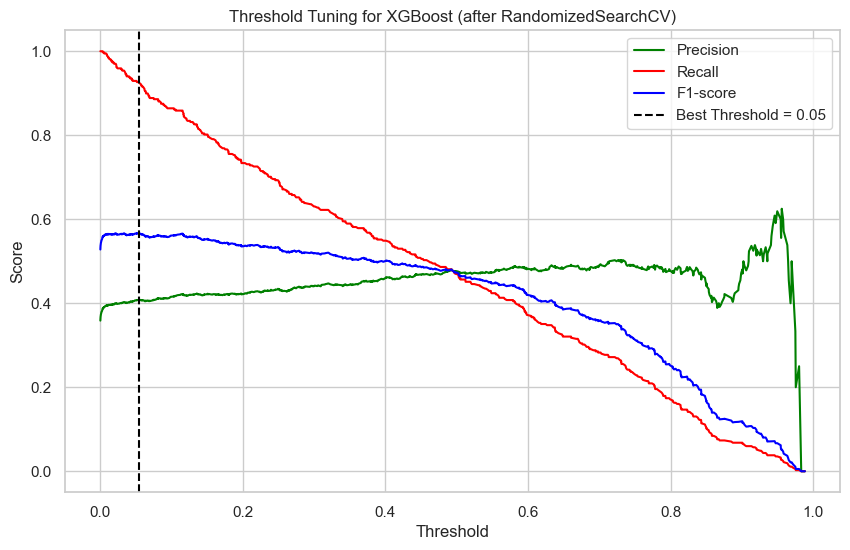

In [85]:
## Model 6 XGBoost with RandomizedSearchCV with SMOTE oversampling


# -----------------------------
# 1. Load diarrheo dataset records
# -----------------------------
df_sampled = df_dia.copy()

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocessing
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak'
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", 
             "cases_4wk_avg", "day", "month", "week_of_outbreak", "year", "Longitude"]

X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Apply SMOTE on training data
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, training dataset shape: {X_train_res.shape}")
print(f"Training target distribution after SMOTE:\n{pd.Series(y_train_res).value_counts(normalize=True)}")

# -----------------------------
# 7. Hyperparameter tuning with RandomizedSearchCV
# -----------------------------
param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 4, 5, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "min_child_weight": [1, 3, 5]
}

xgb_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_res, y_train_res)

print("Best Params:", random_search.best_params_)
print("Best ROC-AUC (CV):", random_search.best_score_)

# -----------------------------
# 8. Train best model
# -----------------------------
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train_res, y_train_res)

# Predict probabilities
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# -----------------------------
# 9. Threshold tuning
# -----------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best Threshold (maximizing F1):", best_threshold)

# Apply threshold
y_pred_tuned = (y_prob >= best_threshold).astype(int)

# -----------------------------
# 10. Evaluation
# -----------------------------
print("\nClassification Report (Threshold Tuned):")
print(classification_report(y_test, y_pred_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 11. Plot curves
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], label="Precision", color="green")
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.plot(thresholds, f1_scores[:-1], label="F1-score", color="blue")
plt.axvline(x=best_threshold, color="black", linestyle="--", label=f"Best Threshold = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for XGBoost (after RandomizedSearchCV)")
plt.legend()
plt.grid(True)
plt.show()

Similar to previous models, Precision of outbreak class is 0.41 which means less than half of predicted outbreaks 
are true and Recall of 0.93 shows that 93% of actual outbreaks are classified correctly. Though this model is excellent 
for outbreak surveillance with high sensitivity to real outbreaks 
but has low precision leading to lots of false alerts.

In [86]:
## Ensemble Model


# -----------------------------
# 1. Copy dataframe
# -----------------------------
df_sampled = df_dia.copy()

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
#  Preprocessing
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak'
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", 
             "cases_4wk_avg", "day", "month", "week_of_outbreak", "year", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# -----------------------------
# 6. Handle missing values and scale
# -----------------------------
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# Calculate scale_pos_weight for XGBoost to handle imbalance
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# -----------------------------
# 9. Define base models for ensemble
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    max_depth=8,
    min_samples_split=5
)

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# -----------------------------
#  Create Voting Classifier (soft voting)
# -----------------------------
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)],
    voting='soft'
)

# -----------------------------
# . Train ensemble
# -----------------------------
ensemble.fit(X_train, y_train)

# -----------------------------
# . Predict and evaluate
# -----------------------------
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Sampled dataset shape: (5127, 21)
diar_outbreak_flag
0    0.641701
1    0.358299
Name: proportion, dtype: float64


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.60      0.67       658
           1       0.48      0.66      0.55       368

    accuracy                           0.62      1026
   macro avg       0.62      0.63      0.61      1026
weighted avg       0.66      0.62      0.63      1026

ROC-AUC: 0.6855920444033303


### no significant performance improvement compared to previous models.

Class Weights: {np.int64(0): np.float64(0.779277566539924), np.int64(1): np.float64(1.3951667801225323)}


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.4904 - loss: 0.6873 - val_accuracy: 0.5473 - val_loss: 0.6749 - learning_rate: 0.0010
Epoch 2/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5731 - loss: 0.6735 - val_accuracy: 0.5639 - val_loss: 0.6696 - learning_rate: 0.0010
Epoch 3/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5731 - loss: 0.6672 - val_accuracy: 0.5698 - val_loss: 0.6628 - learning_rate: 0.0010
Epoch 4/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5858 - loss: 0.6580 - val_accuracy: 0.5727 - val_loss: 0.6459 - learning_rate: 0.0010
Epoch 5/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5994 - loss: 0.6402 - val_accuracy: 0.5834 - val_loss: 0.6402 - learning_rate: 0.0010
Epoch 6/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5804 - loss: 0.6337 - val_accuracy: 0.5912 - val_loss: 0.6328 - learning_rate: 0.0010
Epoch 7/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5931 - loss: 0.6287 - val_ac

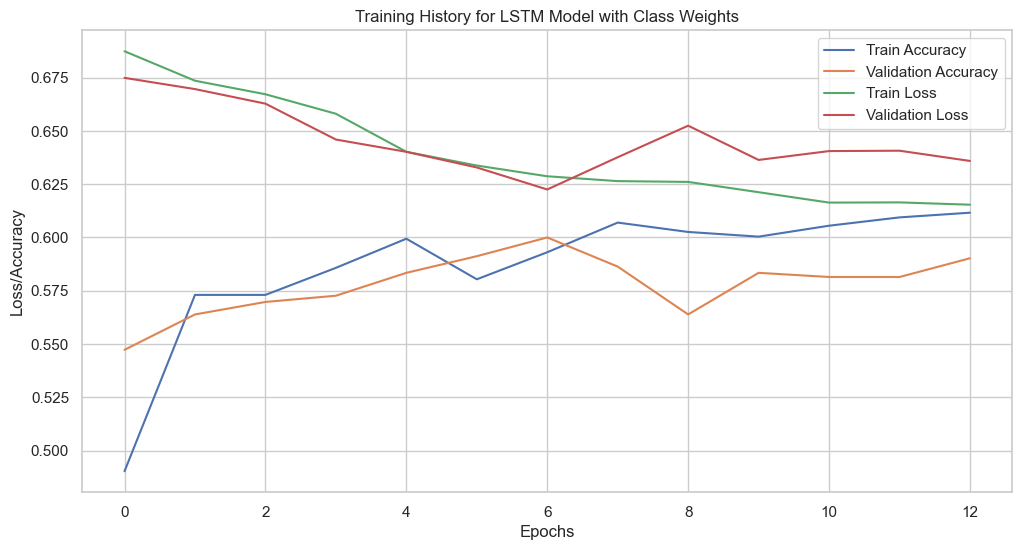

In [89]:
### Model # 7 LSTM model 

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


# -----------------------------
# Load the diarrheo dataset
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
#  Preprocess features 
# -----------------------------
df_sampled_sorted = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Label encode district
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

# Cyclical encoding for 'week_of_outbreak'
df_sampled["week_sin"] = np.sin(2 * np.pi * df_sampled["week_of_outbreak"] / 52)
df_sampled["week_cos"] = np.cos(2 * np.pi * df_sampled["week_of_outbreak"] / 52)

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", 
             "cases_4wk_avg", "day", "month", "week_of_outbreak", "year", "Longitude"]

X = df_sampled_sorted.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled_sorted["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# Reshape Data for LSTM (3D array: [samples, time_steps, features])
# -----------------------------
time_steps = 3  # use 3 weeks past data
X_seq, y_seq = [], []

for i in range(time_steps, len(X_scaled)):
    X_seq.append(X_scaled[i-time_steps:i])  
    y_seq.append(y.iloc[i])  

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)


# -----------------------------
#  Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)

# -----------------------------
#  Compute Class Weights
# compute_class_weight: It calculates how much each class should be weighted so that the loss function pays more attention to underrepresented classes.
# Misclassifying outbreaks (1) contributes more to the loss → model adjusts parameters harder in those cases.
# Misclassifying non-outbreaks (0) contributes less → model isn’t punished as much for false alarms.
# With class weights → model is “reminded” that missing an outbreak is more costly, so it improves recall for class 1.
# Impact on performance → Recall ↑, F1-score ↑, Precision may ↓, but overall better for public health use case (catching outbreaks matters most).
# -----------------------------
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("Class Weights:", class_weight_dict)

# -----------------------------
#  Build LSTM Model
# -----------------------------
# -----------------------------
# Build Deeper LSTM Model
# -----------------------------
model = Sequential()

# First LSTM layer (returns sequence to feed next LSTM)
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))

# Second LSTM layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer (final recurrent layer, no return_sequences)
model.add(LSTM(32))
model.add(Dropout(0.3))

# Optional Dense hidden layer before output
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Callbacks 
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)


# -----------------------------
# Train the Model with Class Weights
# -----------------------------


history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# -----------------------------
#  Predictions with Threshold Tuning
# -----------------------------
y_prob = model.predict(X_test)

# Tune threshold by maximizing F1-score
best_threshold = 0.5
best_f1 = 0

for t in np.arange(0.1, 0.91, 0.01):
    y_pred_temp = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nOptimal Threshold: {best_threshold:.2f} with F1 = {best_f1:.4f}")

# Apply best threshold
y_pred = (y_prob >= best_threshold).astype(int)

# -----------------------------
# 9. Evaluate Model
# -----------------------------
print("\nClassification Report (Threshold Tuned):")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 10. Plot Training History
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History for LSTM Model with Class Weights')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


Class 0 = No Outbreak Precision = 0.83 => few false negatives for non-outbreaks
                      Recall = 0.38 Catches ~38% of actual non-outbreaks. Meaning it often mislabels no outbreak weeks as outbreaks.
Class 1 = Outbreak
                    Precision = 0.44
                    many false alarms
                    Recall = 0.86 The model successfully detects 81% of true outbreaks =? very strong sensitivity.